#Breast Cancer Wisconsin (Diagnostic) Data Set - ML model training 04/12/2025




### **0.1 Importing the Data**

This was not ideal because I just downloaded the data into data without downloading it into BC dataset

But now that I have the data.csv I need, create validation and test datasets with seperated sets of positives and negatives

### **0.1 Inspecting the data**

Helpful site when working with and navigating Google Colab

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.diagnosis

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M



We get a dataframe with where we have 569 samples
- id diagnosis is eihter M or B for malignant or benign / positive or negative
- an ID of the sample which we can ignore
- and 31 other features as numbers

Now we want to see if we can extract random rows, or rows with specific values

In [ ]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 569 rows and 33 columns


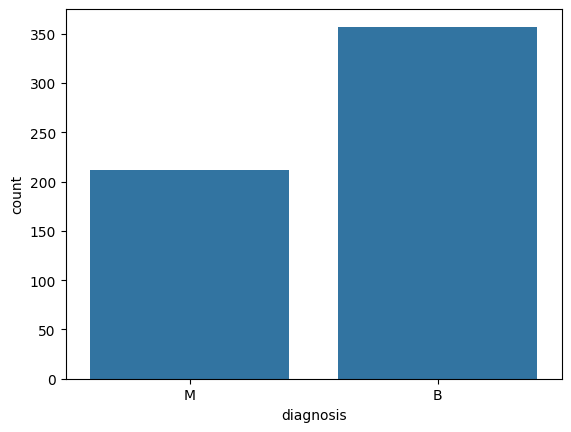

In [ ]:
ax = sns.countplot(x="diagnosis", data =df )

The dataset seems to be a bit imbalanced!

### **0.3 Tansforming the Data into usuable Datasets**

Using different libraries we want to transform the tabular data in pytorch compliant datasets

1) Replace the labels Malignent ( M ) and Benign ( B ) with signal ( 1 ) and noise ( 0 )
2) Splitting the data into test split and trainsplit  
3) Recaling with StandardScaler

In [ ]:
#Import libraries

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

import seaborn as sns

import torch
import torch.utils.data as data
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.optim import SGD
from torch.nn import Sequential

import sys
sys.path.append('/content/drive/MyDrive/ColabNotebooks')

`Stratifying` preserves the proportion of how data is distributed in the target column - and depicts that same proportion of distribution in the train_test_split

In [ ]:
# Replace the labels
df.diagnosis = df.diagnosis.apply(lambda x:1 if x=='M' else 0)

# Define Features
X = df.iloc[:, 2: -1]

#Define Labels
y = df.diagnosis

#Define the splits
X_train, X_test, y_train, y_test = train_test_split (X.values, y.values, test_size =0.3, stratify =y )
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)

# Rescaling the Data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### **0.4 Playing around with the Pandas Dataframe**

In [ ]:
X.index

RangeIndex(start=0, stop=569, step=1)

In [ ]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
X.dtypes

,0
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64
fractal_dimension_mean,float64


In [ ]:
#Setting up device agnostic code

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
#Define Hyperparameters for Training and Testing

epochs = 100
batch_size = 32
learning_rate = 0.01
momentum = 0.9
n_inputs = X_train.shape[1] # number of features as a softcoded parameter
optimizer = SGD
loss_fn = nn.BCELoss()

## **0.4 Import the Dataset**

In [ ]:
#Import the util libraries

import matplotlib.pyplot as plt
from typing import Dict, List

import sys
sys.path.append('/content/drive/MyDrive/ColabNotebooks')
import torch
from torch import nn

#Import the datasets
import my_datasets
from my_datasets import BCW_Dataset_Tabular
from my_datasets import BCW_Dataset_Matrices

#Import the trainfunction
import my_train
from my_train import train_step
from my_train import test_step
from my_train import train

#Import the models
import models
from models import FC_NN, CNN1D
from models import CNN

#Import the custom utils
import my_helperfunctions
from my_helperfunctions import plot_loss_curves
from my_helperfunctions import table2matrix

In [ ]:
# Define test train and validation datasets

train_dataset = BCW_Dataset_Tabular(X_train, y_train)
val_dataset = BCW_Dataset_Tabular(X_val, y_val)
test_dataset = BCW_Dataset_Tabular(X_test, y_test)

# Define test, train and validation Dataloaders

train_dl = DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle = True)
val_dl = DataLoader(dataset=val_dataset, batch_size = X_val.shape[0], shuffle = False)
test_dl = DataLoader(dataset=test_dataset, batch_size = X_test.shape[0], shuffle = False)

##**1.0 Training**

Here we do the training and eval loop in which we   

Loop over the number of epochs
  1) Do the forward pass
  2) Turn the logits into probabilities
  3) Calculate the loss
  4) Loss Backwards via Gradient descent
  5) Calculate the test loss

    1.   Set to evaluation mode
    2.   do the forward pass
    3.   Calculate the eval loss
  
  6) Save all the losses for analysis later

##**1.1 Training the FC model**


In [ ]:
#Define device agnostically

device = "cuda" if torch.cuda.is_available() else "cpu"

#Import timeit
from timeit import default_timer as timer

# Here we are training the FC Model from Section 1.1
model_FCv2 = FC_NN(n_in = n_inputs, n_out = 1)

#Start the timer
start_time = timer()

# Training the model
model_FCv2_results =train(model = model_FCv2,
      train_dataloader = train_dl,
      test_dataloader = test_dl,
      optimizer =SGD(model_FCv2.parameters(),lr= learning_rate, momentum =0.9),
      loss_fn = loss_fn,
      epochs =100,
      device = device)

end_time = timer()

print( f"Total training time : {end_time-start_time :.3f} seconds")

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss : 0.6921 | test_loss : 0.6637 | test_acc  :  0.7442 | train_acc : 0.4643 | 
Epoch: 11 | train_loss : 0.0650 | test_loss : 0.1232 | test_acc  :  0.9535 | train_acc : 0.9880 | 
Epoch: 21 | train_loss : 0.0408 | test_loss : 0.1054 | test_acc  :  0.9535 | train_acc : 0.9928 | 
Epoch: 31 | train_loss : 0.0402 | test_loss : 0.0967 | test_acc  :  0.9535 | train_acc : 0.9921 | 
Epoch: 41 | train_loss : 0.0232 | test_loss : 0.0883 | test_acc  :  0.9767 | train_acc : 0.9952 | 
Epoch: 51 | train_loss : 0.0234 | test_loss : 0.0875 | test_acc  :  0.9767 | train_acc : 0.9921 | 
Epoch: 61 | train_loss : 0.0139 | test_loss : 0.0859 | test_acc  :  0.9767 | train_acc : 0.9952 | 
Epoch: 71 | train_loss : 0.0138 | test_loss : 0.0875 | test_acc  :  0.9767 | train_acc : 0.9921 | 
Epoch: 81 | train_loss : 0.0118 | test_loss : 0.0902 | test_acc  :  0.9767 | train_acc : 0.9976 | 
Epoch: 91 | train_loss : 0.0097 | test_loss : 0.0930 | test_acc  :  0.9651 | train_acc : 0.9976 | 
Total train

##**1.2 Training the C1NN model**

In [ ]:
#Import timeit
from timeit import default_timer as timer
import torch.nn as nn
import torch.nn.functional as F

device = "cuda" if torch.cuda.is_available() else "cpu"

# Here we are training the FC Model from Section 1.1
model_C1NNv1 = CNN1D(n_features = n_inputs)

#Start the timer
start_time = timer()

# Training the model
model_C1NNv1_results =train(model = model_C1NNv1,
      train_dataloader = train_dl,
      test_dataloader = test_dl,
      optimizer =SGD(model_C1NNv1.parameters(),lr= learning_rate, momentum =0.9),
      loss_fn = loss_fn,
      epochs =100,
      device = device)

end_time = timer()

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss : 0.5106 | test_loss : 0.3551 | test_acc  :  0.8837 | train_acc : 0.7524 | 
Epoch: 11 | train_loss : 0.0585 | test_loss : 0.1219 | test_acc  :  0.9419 | train_acc : 0.9832 | 
Epoch: 21 | train_loss : 0.0500 | test_loss : 0.1380 | test_acc  :  0.9535 | train_acc : 0.9856 | 
Epoch: 31 | train_loss : 0.0415 | test_loss : 0.1391 | test_acc  :  0.9651 | train_acc : 0.9880 | 
Epoch: 41 | train_loss : 0.0328 | test_loss : 0.1469 | test_acc  :  0.9651 | train_acc : 0.9904 | 
Epoch: 51 | train_loss : 0.0265 | test_loss : 0.1553 | test_acc  :  0.9651 | train_acc : 0.9928 | 
Epoch: 61 | train_loss : 0.0244 | test_loss : 0.1632 | test_acc  :  0.9651 | train_acc : 0.9952 | 
Epoch: 71 | train_loss : 0.0195 | test_loss : 0.1654 | test_acc  :  0.9419 | train_acc : 0.9976 | 
Epoch: 81 | train_loss : 0.0158 | test_loss : 0.1732 | test_acc  :  0.9419 | train_acc : 0.9952 | 
Epoch: 91 | train_loss : 0.0130 | test_loss : 0.1753 | test_acc  :  0.9419 | train_acc : 0.9976 | 


## **3.0 Modulating the dataset with turning the tabular data into matrices and then training them**

###**3.1 Converting the tabular data into matrices**

In [ ]:
# Import the table2matrix helperfunction
from my_helperfunctions import table2matrix

# Convert the features of dataframe X into a matrix
X_matrix = table2matrix(X, normalization="minmax")

[INFO] Finished combining vectors into matrix with how datatype <class 'list'>


/content/drive/MyDrive/ColabNotebooks/my_helperfunctions.py:105: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rounded_value = round(table.iloc[i][j]/digits)


### **3.2 Dividing them up into training / testsplit**

In [ ]:
#Create Test / Train etc. matrices

#Define the splits
X_matrix_train, X_matrix_test, y_train, y_test = train_test_split (X_matrix, y.values, test_size =0.3, stratify =y )
X_matrix_val, X_matrix_test, y_val, y_test = train_test_split(X_matrix_test, y_test, test_size=0.5, stratify=y_test)

# Create the Datasets
train_matrix_dataset = BCW_Dataset_Tabular(X_matrix_train, y_train)
val_matrix_dataset = BCW_Dataset_Tabular(X_matrix_val, y_val)
test_matrix_dataset = BCW_Dataset_Tabular(X_matrix_test, y_test)

# Create the DataLoaders
train_matrix_dl = DataLoader(dataset=train_matrix_dataset, batch_size = len(X_matrix_train), shuffle = True)
val_matrix_dl = DataLoader(dataset=val_matrix_dataset, batch_size = len(X_matrix_val), shuffle = False)
test_matrix_dl = DataLoader(dataset=test_matrix_dataset, batch_size = len(X_matrix_test), shuffle = False)

In [ ]:
len(train_matrix_dataset)

398

In [ ]:
X, y = train_matrix_dataset[0]
print(X.shape, X.dtype)

torch.Size([30, 10]) torch.float64


In [ ]:
print(f"type(train_matrix_dataset[0][0]) : {train_matrix_dataset} : {train_matrix_dataset[0][0].dtype}")

type(train_matrix_dataset[0][0]) : <my_datasets.BCW_Dataset_Tabular object at 0x7bf0994a3c20> : torch.float64


In [ ]:
print(f"type(train_matrix_dataset[0][1]) : {train_matrix_dataset[0][1]} : {train_matrix_dataset[0][1].dtype}")
print(f"type(train_matrix_dataset[0][0]) : {train_matrix_dataset[0][0]} : {train_matrix_dataset[0][0].dtype}")

type(train_matrix_dataset[0][1]) : 0 : int64
type(train_matrix_dataset[0][0]) : tensor([[1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0.,

### **3.3 Training and Testing**

####**3.3.1 Training and testing CNN**

In [ ]:

print(inspect.getsource(CNN))

class CNN(nn.Module):
  def __init__(self, n_features, n_in_channels):
    super().__init__()

    # Create First Convolutional Layer
    self.conv1 = nn.Conv2d(in_channels = n_in_channels, out_channels = 8, kernel_size =3, padding =1 )

    # Creat Pooling Layer
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    #Create Second Convolutional Layer
    self.conv2  =nn.Conv2d(in_channels = 8, out_channels =16, kernel_size = 3, padding =1)

    # Using LazyLinear that automatically inferes the number of input parameters after convolution and pooling
    self.fc1 = nn.LazyLinear(500)
    self.fc2 = nn.Linear(500,1)
    self.double()

  def forward(self, x):
    """
    Define the forward pass of this CNN Architecture

    Args:
      x: input tensor

    Returns:
      Output 1-D tensor for binary classification
    """
    print(f"x.shape before usqueezing : {x.shape}")
    x = x.unsqueeze(1)
    print(f"x.shape after unsqueezing : {x.shape}")
    x = F.relu(self.conv1(x))    # Ap

In [ ]:
#Define device agnostically

device = "cuda" if torch.cuda.is_available() else "cpu"

#Import timeit

# Here we are training the FC Model from Section 1.1
model_CNN = CNN(n_features = n_inputs,n_in_channels=1)

#
learning_rate = 5e-4

#Start the timer
start_time = timer()

# Training the model
model_CNN_results =train(model = model_CNN,
      train_dataloader = train_matrix_dl,
      test_dataloader = test_matrix_dl,
      optimizer =SGD(model_CNN.parameters(),lr= learning_rate, momentum =0.9),
      loss_fn = loss_fn,
      epochs =10,
      device = device)

end_time = timer()

  0%|          | 0/10 [00:00<?, ?it/s]

x.shape before usqueezing : torch.Size([398, 30, 10])
x.shape after unsqueezing : torch.Size([398, 1, 30, 10])
x.shape after first convolution : torch.Size([398, 8, 30, 10])
x.shape after seond convolution : torch.Size([398, 16, 30, 10])
x.shape after reshaping : torch.Size([398, 4800])
x.shape before usqueezing : torch.Size([86, 30, 10])
x.shape after unsqueezing : torch.Size([86, 1, 30, 10])
x.shape after first convolution : torch.Size([86, 8, 30, 10])
x.shape after seond convolution : torch.Size([86, 16, 30, 10])
x.shape after reshaping : torch.Size([86, 4800])
Epoch: 1 | train_loss : 0.6897 | test_loss : 0.6898 | test_acc  :  0.6279 | train_acc : 0.6281 | 
x.shape before usqueezing : torch.Size([398, 30, 10])
x.shape after unsqueezing : torch.Size([398, 1, 30, 10])
x.shape after first convolution : torch.Size([398, 8, 30, 10])
x.shape after seond convolution : torch.Size([398, 16, 30, 10])
x.shape after reshaping : torch.Size([398, 4800])
x.shape before usqueezing : torch.Size([86,

##**4.0 Evaluation and Analysis**

To evaluate the performance of our models, we introduce industry-standard metrics

1.   ROC
2.   Accuracy
3.   Confusion matrix


In [ ]:
#1 Check the model_FCv2_results keys
model_FCv2_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

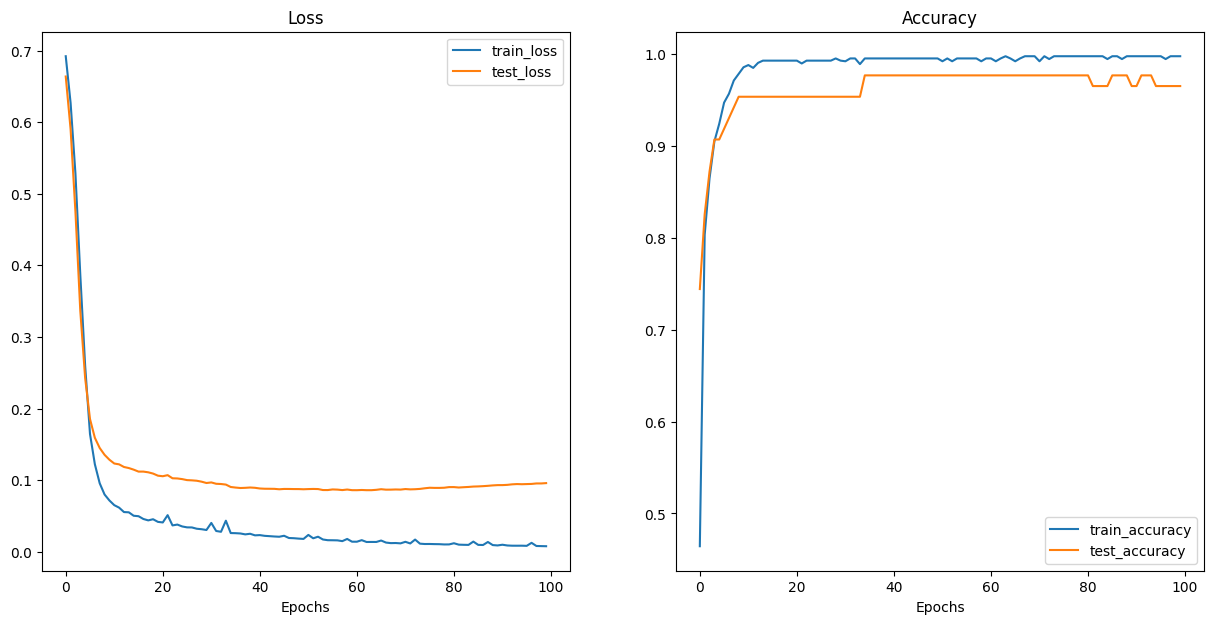

In [ ]:
plot_loss_curves(model_FCv2_results)

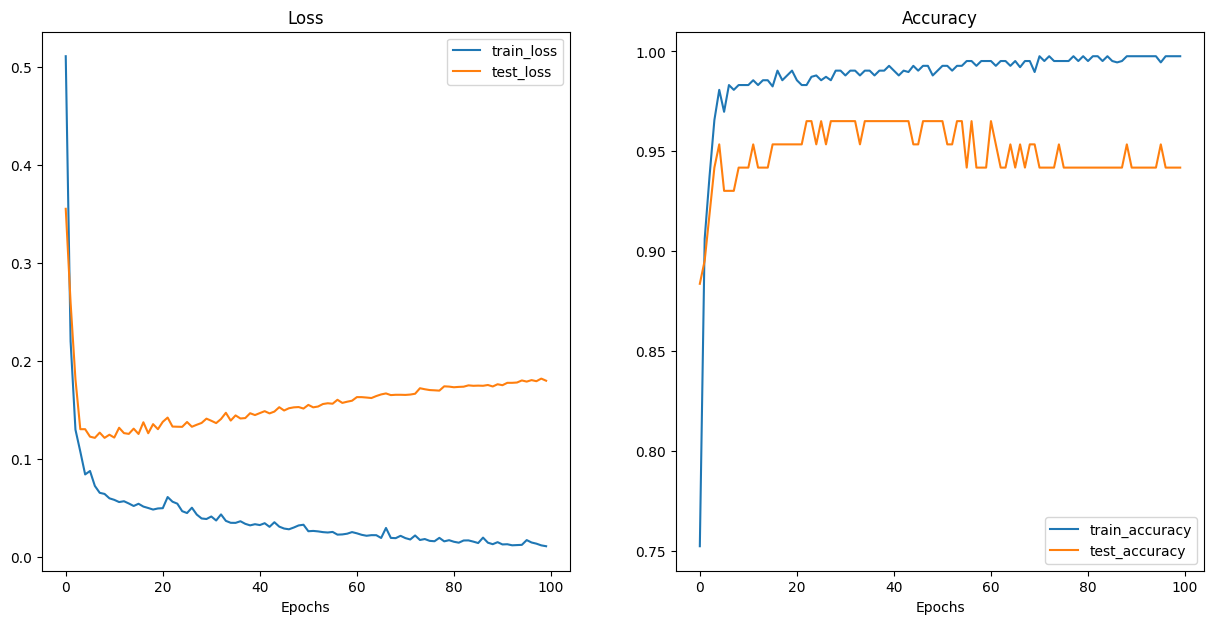

In [ ]:
plot_loss_curves(model_C1NNv1_results)

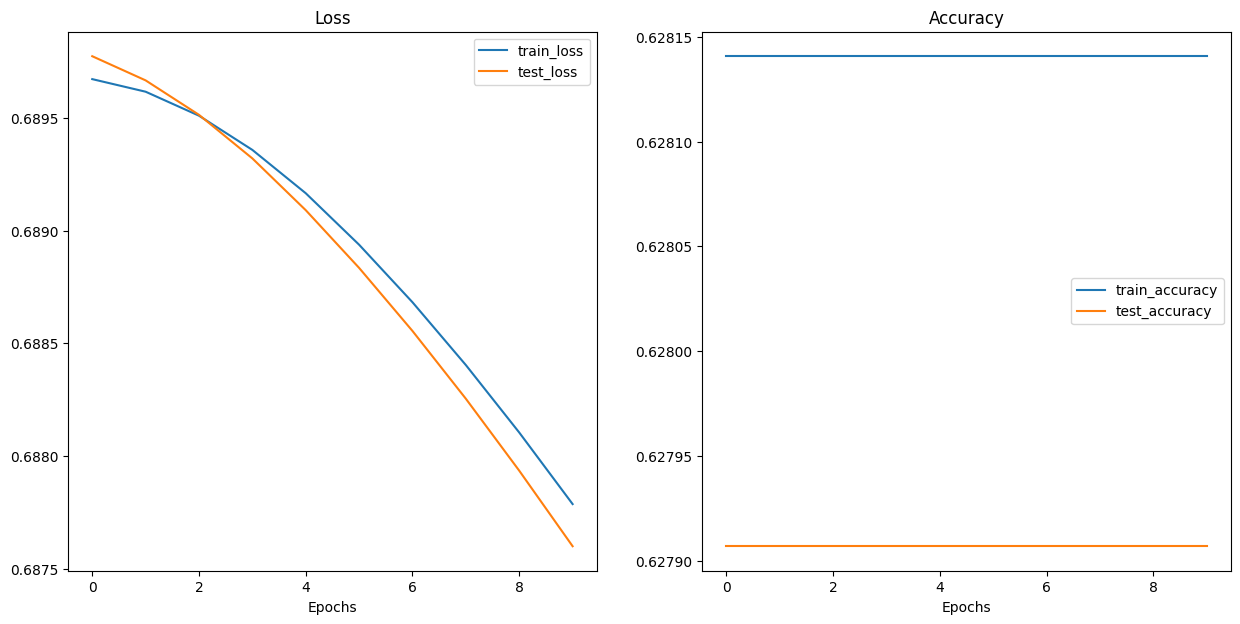

In [ ]:
plot_loss_curves(model_CNN_results)

*   Fix the potential problem of table overwriting itself if i turn M->0 or else 1 so that it doesn't turn everything into  0 or 1


**Further training**
*   Establish regularization for FFN
*   Train C1NN
*   Train C1NN with regularization
*   Establish Regularization

**Documentation**
*   Documentation
*   ~Move the models to `model.py` and the helperfunctions to `helperfunctions.py`~

**Further Training methods**
*   ~try converting the tabular data to matrices~
*   ~create helperfunction `table2matrix`and move it to `helperfunctions.py`~
*   ~Create CNN model~
*   Create ResNet model
*   Create Transformer model

**Evaluation Metrics**
*   create a conspicutity graph and ROC Curves
    *   for C1NN
    *   for FCN
    *   table2matrix ( ResNet, CNN )

